In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import dataset
from sklearn.preprocessing import MinMaxScaler

In [0]:
forex_data = pd.read_csv('EURUSD.I60.csv')
forex_data.columns = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
forex_data = forex_data[['Date', 'Time', 'Open', 'High', 'Low', 'Close']]

In [3]:
forex_data.head()

,Date,Time,Open,High,Low,Close
0,2012.08.10,01:00,1.23021,1.23023,1.22921,1.22926
1,2012.08.10,02:00,1.22925,1.23000,1.22905,1.22976
2,2012.08.10,03:00,1.22973,1.22976,1.22904,1.22960
3,2012.08.10,04:00,1.22964,1.22978,1.22911,1.22957
4,2012.08.10,05:00,1.22959,1.23011,1.22875,1.22922


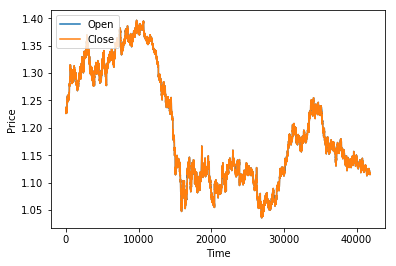

In [4]:
dataset.plot_data(forex_data)

In [0]:
close_data = forex_data.Close

In [0]:
scaler = MinMaxScaler()
close_data = close_data.values.reshape(close_data.shape[0], 1)
close_data = scaler.fit_transform(close_data)

In [30]:
X,y = dataset.process_data(close_data, 1000)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

32684
8171
32684
8171


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import CuDNNLSTM, Dense

In [34]:
#Build the model
model = Sequential()
model.add(CuDNNLSTM(512,input_shape=(1000,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),shuffle=False)

Train on 32684 samples, validate on 8171 samples
Epoch 1/20
32684/32684 [==============================] - 133s 4ms/sample - loss: 0.0013 - val_loss: 0.0134
Epoch 2/20
32684/32684 [==============================] - 131s 4ms/sample - loss: 0.0011 - val_loss: 0.0233
Epoch 3/20
32684/32684 [==============================] - 132s 4ms/sample - loss: 0.0012 - val_loss: 0.0224
Epoch 4/20
32684/32684 [==============================] - 133s 4ms/sample - loss: 0.0013 - val_loss: 0.0242
Epoch 5/20
32684/32684 [==============================] - 131s 4ms/sample - loss: 0.0012 - val_loss: 0.0296
Epoch 6/20
32684/32684 [==============================] - 131s 4ms/sample - loss: 0.0012 - val_loss: 0.0284
Epoch 7/20
32684/32684 [==============================] - 132s 4ms/sample - loss: 0.0012 - val_loss: 0.0286
Epoch 8/20
32684/32684 [==============================] - 131s 4ms/sample - loss: 0.0011 - val_loss: 0.0248
Epoch 9/20
32684/32684 [==============================] - 131s 4ms/sample - loss: 0.001

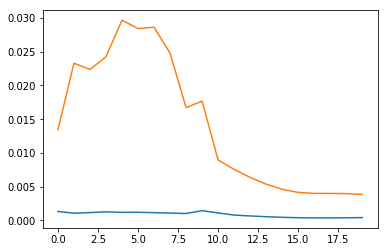

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

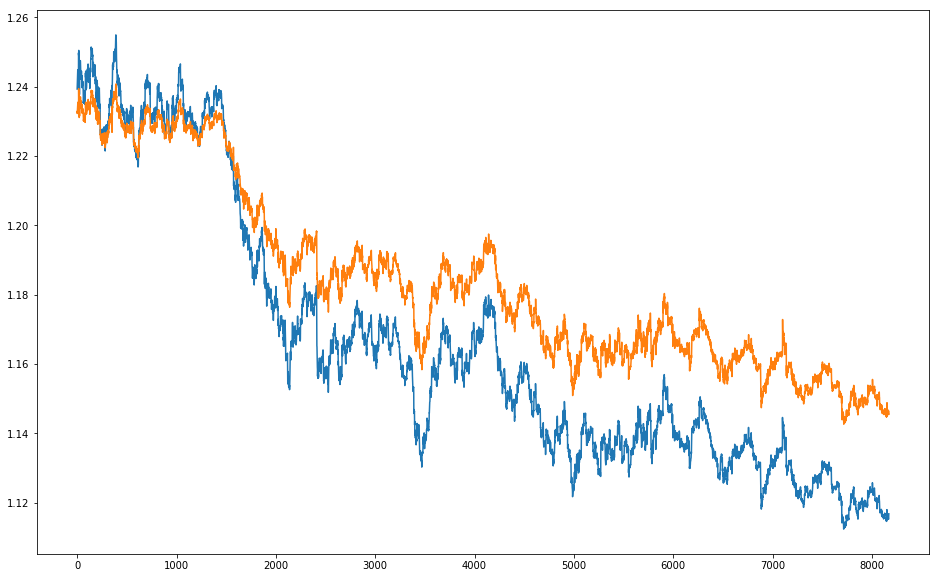

In [37]:
Xt = model.predict(X_test)
plt.figure(figsize=(16, 10))
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scaler.inverse_transform(Xt))


In [0]:
prediction = scaler.inverse_transform(Xt).tolist()
ground_truth = scaler.inverse_transform(y_test.reshape(-1,1)).tolist()
prediction = [item[0] for item in prediction]
ground_truth  = [item[0] for item in ground_truth]
prediction_sample_test = pd.DataFrame({'prediction':prediction, 'Ground_truth':ground_truth})


In [19]:
prediction_sample_test.head()

,prediction,Ground_truth
0,1.225042,1.22467
1,1.223515,1.22360
2,1.222492,1.22331
3,1.222250,1.22131
4,1.220755,1.22153


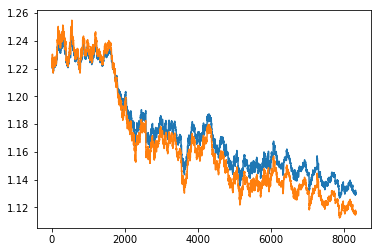

In [23]:
plt.plot(prediction_sample_test)

In [0]:
prediction_sample_test.to_csv('prediction_sample_test.csv', index = False)

In [0]:
pred = pd.read_csv('prediction_sample_test.csv')

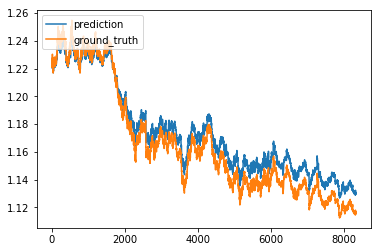

In [25]:
plt.figure()
plt.plot(pred)
plt.legend(['prediction', 'ground_truth'], loc='upper left')

In [27]:
len(prediction)

8331